In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

#Read in the data 
df = pd.read_csv(r'C:\Users\49157\Desktop\Data Analysis Portfolios\Path 4\movies.csv\movies.csv')


In [61]:
# Reordering the columns of the dataframe by ascending order

cols = df.columns.tolist()
cols.sort()
df = df[cols]



In [62]:
# Taking a look at the data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [63]:
#Checking if there is missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.2831246739697444%
company - 0.002217005738132499%
country - 0.0003912363067292645%
director - 0.0%
genre - 0.0%
gross - 0.02464788732394366%
name - 0.0%
rating - 0.010041731872717789%
released - 0.0002608242044861763%
runtime - 0.0005216484089723526%
score - 0.0003912363067292645%
star - 0.00013041210224308815%
votes - 0.0003912363067292645%
writer - 0.0003912363067292645%
year - 0.0%


In [64]:
len(df[df.isna().any(axis=1)].index)

2247

In [65]:
df = df.dropna()

In [66]:
# Data types of the column
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [67]:
# change data type of columns 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [68]:
# add the correct year column

#df[['0', '1']] = df['released'].str.split(',', expand=True)
df['year_correct'] = df['released'].str.split(',', expand=True)[1].str[1:5]
#df['year_correct'] = df['released'].astype(str).str[:4]


In [69]:
len(df[df.isna().any(axis=1)].index)

14

In [70]:
#viewing rows with nan values
df[df.isna().any(axis=1)]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
312,15000000,Cable and Wireless Finance,United States,Fred Zinnemann,Drama,199078,Five Days One Summer,PG,1982 (Japan),108.0,6.1,Sean Connery,1000.0,Michael Austin,1982,None
449,220000,Seventh Avenue Films,United States,William Olsen,Comedy,975414,Getting It on,R,August 1983 (United States),96.0,3.7,Martin Yost,208.0,William Olsen,1983,None
467,50000,Charles Burnett Productions,United States,Charles Burnett,Drama,26177,My Brother's Wedding,Not Rated,March 1985 (United States),115.0,7.2,Everett Silas,826.0,Charles Burnett,1983,None
800,7000000,Metro-Goldwyn-Mayer (MGM),United States,Robert Altman,Comedy,29815,O.C. and Stiggs,R,1985 (United States),109.0,5.4,Daniel Jenkins,1200.0,Tod Carroll,1985,None
1173,14000000,Orion Pictures,United States,Peter Yates,Thriller,459824,The House on Carroll Street,PG,1987 (United States),101.0,6.1,Kelly McGillis,2300.0,Walter Bernstein,1987,None
1212,5500000,Cineplex Odeon Films,United Kingdom,Tony Bill,Crime,969205,Five Corners,R,May 1988 (United Kingdom),90.0,6.2,Jodie Foster,3100.0,John Patrick Shanley,1987,None
1404,4000000,Atlantic Entertainment Group,United Kingdom,Mike Figgis,Crime,1791328,Stormy Monday,R,May 1988 (United States),93.0,6.2,Melanie Griffith,3800.0,Mike Figgis,1988,None
1819,17500000,Twentieth Century Fox,United States,Alan Parker,Drama,947306,Come See the Paradise,R,January 1991 (United States),138.0,6.7,Dennis Quaid,2600.0,Alan Parker,1990,None
2029,6900000,Initial Entertainment Group (IEG),United States,Mike Figgis,Mystery,133645,Liebestraum,R,November 1991 (United States),112.0,5.9,Kevin Anderson,1500.0,Mike Figgis,1991,None
2318,1500000,Davis-Films,France,Roger Avary,Crime,418961,Killing Zoe,R,September 1994 (United States),96.0,6.5,Eric Stoltz,20000.0,Roger Avary,1993,None


In [71]:
df = df.dropna()

In [72]:
df['year_correct'] = df['year_correct'].astype(str).astype('int64')

In [73]:
#Checking films, whose extracted year doesn't match year column
counter = 0
for i in df.index:
    if df['year'][i] != df['year_correct'][i]:
        #print( df.loc[[i]]) # printing out rows where year and year_correct don't match
        print (df['year'][i], df['year_correct'][i])
        counter = counter + 1


1980 1981
1980 1984
1980 1981
1980 1981
1981 1983
1981 1982
1981 1982
1981 1982
1981 1982
1981 1982
1981 1983
1981 1982
1981 1982
1981 1982
1981 1982
1981 1982
1982 1983
1982 1983
1982 1983
1982 1983
1982 1983
1982 1983
1982 1983
1982 1983
1982 1983
1982 1983
1983 1984
1983 1984
1983 1984
1983 1984
1983 1984
1983 1984
1983 1987
1983 1984
1984 1985
1984 1985
1984 1985
1984 1985
1984 1985
1984 1985
1984 1985
1984 1985
1985 1986
1985 1986
1985 1986
1985 1986
1985 1986
1985 1986
1985 1986
1985 1986
1986 1987
1986 1987
1986 1987
1986 1990
1986 1987
1986 1987
1986 1987
1986 1987
1986 1987
1987 1988
1987 1988
1987 1988
1987 1988
1987 1988
1987 1992
1987 1988
1987 1988
1988 1989
1988 1990
1988 1989
1988 1990
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1988 1989
1989 1990
1989 1990
1989 1991
1989 1990
1989 1992
1989 1990
1989 1990
1989 1990
1989 1992
1989 1990
1990 1991
1990 1991
1990 1991
1990 1991
1990 1991


In [74]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [75]:
# Uncomment to display the whole dataframe
#pd.set_option('display.max_rows', None)

In [76]:
# Delete duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)
df = df.drop_duplicates()

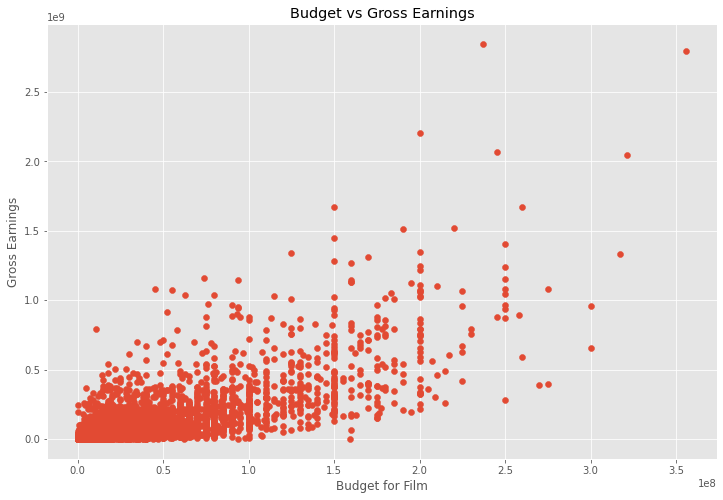

In [77]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [78]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

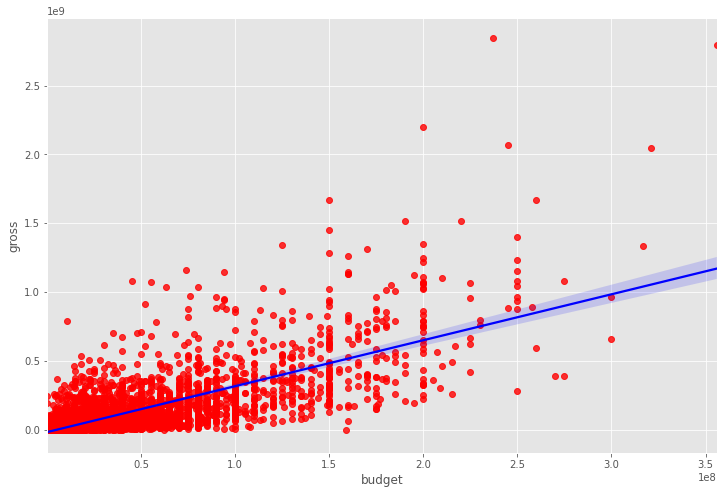

In [79]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [80]:
# Looking at correlation
df.corr(method='pearson') # Methods: Pearson, kendall, spearman

,budget,gross,runtime,score,votes,year,year_correct
budget,1.000000,0.740028,0.318353,0.071552,0.439077,0.326740,0.319669
gross,0.740028,1.000000,0.275641,0.222504,0.614432,0.273512,0.268141
runtime,0.318353,0.275641,1.000000,0.414501,0.352263,0.074849,0.075183
score,0.071552,0.222504,0.414501,1.000000,0.474594,0.055681,0.061443
votes,0.439077,0.614432,0.352263,0.474594,1.000000,0.204904,0.202215
year,0.326740,0.273512,0.074849,0.055681,0.204904,1.000000,0.998962
year_correct,0.319669,0.268141,0.075183,0.061443,0.202215,0.998962,1.000000


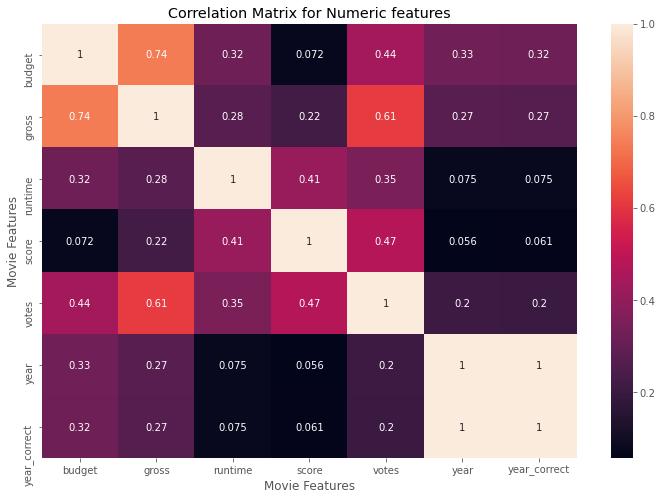

In [81]:
# High correlation between budget and gross
corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [82]:
#Converting String columns into catergory type
df_numerized = df.copy(deep=True)

for col in df_numerized.columns:
    if(df_numerized[col].dtype =='object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

                                       

In [84]:
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
5445,237000000,1376,47,781,0,2847246203,386,5,521,162.0,7.8,1527,1100000.0,1260,2009,2009
7445,356000000,978,47,105,0,2797501328,388,5,132,181.0,8.4,1463,903000.0,510,2019,2019
3045,200000000,1376,47,781,6,2201647264,4895,5,528,194.0,7.8,1067,1100000.0,1260,1997,1997
6663,245000000,940,47,765,0,2069521700,3632,5,523,138.0,7.8,355,876000.0,1803,2015,2015
7244,321000000,978,47,105,0,2048359754,389,5,140,149.0,8.4,1463,897000.0,510,2018,2018


In [85]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


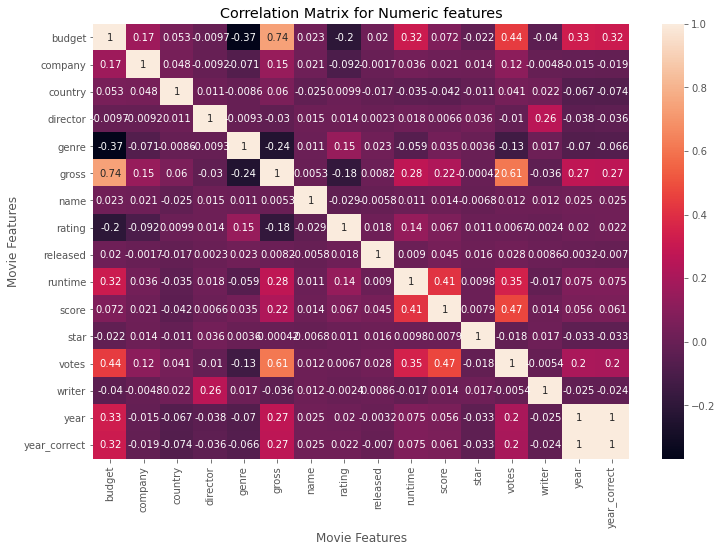

In [87]:
# High correlation between budget and gross
corr_matrix_numerized = df_numerized.corr(method='pearson')

sns.heatmap(corr_matrix_numerized, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [88]:
correlation_pairs = corr_matrix.unstack()
correlation_pairs

budget        budget          1.000000
              company         0.169168
              country         0.052579
              director       -0.009708
              genre          -0.368226
              gross           0.740028
              name            0.022954
              rating         -0.203553
              released        0.019633
              runtime         0.318353
              score           0.071552
              star           -0.022185
              votes           0.439077
              writer         -0.039757
              year            0.326740
              year_correct    0.319669
company       budget          0.169168
              company         1.000000
              country         0.047912
              director       -0.009179
              genre          -0.071046
              gross           0.148887
              name            0.021215
              rating         -0.092134
              released       -0.001749
              runtime    

In [89]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

budget        genre          -0.368226
genre         budget         -0.368226
gross         genre          -0.243547
genre         gross          -0.243547
rating        budget         -0.203553
budget        rating         -0.203553
gross         rating         -0.181739
rating        gross          -0.181739
genre         votes          -0.134986
votes         genre          -0.134986
rating        company        -0.092134
company       rating         -0.092134
country       year_correct   -0.074050
year_correct  country        -0.074050
genre         company        -0.071046
company       genre          -0.071046
year          genre          -0.070039
genre         year           -0.070039
country       year           -0.067134
year          country        -0.067134
year_correct  genre          -0.066049
genre         year_correct   -0.066049
runtime       genre          -0.059148
genre         runtime        -0.059148
country       score          -0.042119
score         country    

In [98]:
# Extracting high correlation and excluding the correlation of a column with itself as well as the year and extracted year columns
#high_correlation = sorted_pairs[sorted_pairs > 0.5]
high_correlation = sorted_pairs[sorted_pairs.between(left = 0.5, right = 0.99)]
high_correlation

votes   gross     0.614432
gross   votes     0.614432
        budget    0.740028
budget  gross     0.740028
dtype: float64

In [ ]:
# Form the analysis that was conducted, we deduce that the gross profit have the highest correlation
# with the budget and the votes